In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/covid-19nlp-text-classification'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [22]:
os.listdir('/kaggle/input/covid-19-nlp-text-classification')

['Corona_NLP_test.csv', 'Corona_NLP_train.csv']

In [23]:
import pandas as pd
train_data = pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv', encoding = 'latin-1')
test_data = pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv', encoding = 'latin-1')

In [24]:
train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [25]:
test_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [26]:
train_data.info() # Basic Information
print("\nShape: ",train_data.shape) # Shape of data
print("\nChecking for missing values")
train_data.isnull().sum()# Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB

Shape:  (41157, 6)

Checking for missing values


UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [27]:
#Dropping unnecessary columns
train_data.drop(['Location','ScreenName','UserName','TweetAt'],axis=1,inplace=True)
test_data.drop(['Location','ScreenName','UserName','TweetAt'],axis=1,inplace=True)

In [28]:
train_data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [29]:
print("Count of sentiment wise values: \n",train_data.Sentiment.value_counts())

Count of sentiment wise values: 
 Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64


In [30]:
import plotly.express as px
fig=px.histogram(train_data,
                x='Sentiment',
                title='Sentiment Count ',
                color_discrete_sequence=['green'])
fig.update_layout(bargap=0.1)
fig.show()
fig = px.pie(train_data, names='Sentiment',title="Sentiment Distribution")
fig.show()

In [31]:
#Merging data columns Extremely Neagtive Sentiment as Negative and Extremely Positive Sentiment as Positive.
def merge(df):
    df['Sentiment'].replace(to_replace='Extremely Negative',value='Negative',inplace=True)
    df['Sentiment'].replace(to_replace='Extremely Positive',value='Positive',inplace=True)
merge(train_data)
merge(test_data)

In [32]:
train_data['Sentiment'].unique()
test_data['Sentiment'].unique()

array(['Negative', 'Positive', 'Neutral'], dtype=object)

In [33]:
fig = px.pie(train_data, names='Sentiment',title="Sentiment Distribution")
fig.show()

In [34]:
##Function to extract the tweet length   
def text_length(tweet):
    str_len=len(tweet.split(" "))
    return(str_len)
train_data['OriginalLength']= train_data['OriginalTweet'].apply(lambda x:text_length(x))
train_data.head()


,OriginalTweet,Sentiment,OriginalLength
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,8
1,advice Talk to your neighbours family to excha...,Positive,38
2,Coronavirus Australia: Woolworths to give elde...,Positive,14
3,My food stock is not the only one which is emp...,Positive,40
4,"Me, ready to go at supermarket during the #COV...",Negative,38


In [35]:
for i in range (5):
    print(train_data.OriginalTweet[i])
    print("========================================")

@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P
My food stock is not the only one which is empty...

PLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. 
Stay calm, stay safe.

#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j
Me, ready to go at supermarket during the #COVID19 outbreak.

Not because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...

#C

In [36]:
train_data['OriginalLength'].describe()

count    41157.000000
mean        30.327818
std         11.633754
min          1.000000
25%         21.000000
50%         31.000000
75%         40.000000
max        127.000000
Name: OriginalLength, dtype: float64

In [37]:
fig = px.histogram(train_data,
                  x='OriginalLength',
                  marginal='box',
                  title="Length of original tweets")
fig.update_layout(bargap=0.1)
fig.show()

Inferences:
Somewhat normal distribution skewed towards right
outliers are present
Range of length lies b/w 1 to 127
Need for preprocessing
This tweets contain words and parts that do not contribute to the sentiment it conveys.
e.g. : Links, Symbols ,Numbers, Carriage returns , Spaces, URLS, etc
Hence it is necessary to clean the data for better performance

In [38]:
#print(set(stopwords.words('english')))

In [39]:
import string
import re

def data_cleaning(data):
    cleaned_data = []
    fillerWord = ("so","yeah","okay","um","uh","mmm","ahan","uh","huh","ahm","oh","sooo","uh","huh","yeh","yah","hmm","bye")
    fillerword_reg= "bye[.,]|so[.,]|yeah[.,]|okay[.,]|um[.,]|uh[.,]|mmm[.,]|ahan[.,]|uh[.,]|huh[.,]|ahm[.,]|oh[.,]|sooo[.,]|uh[.,]|huh[.,]|yeh[.,]|yah[.,]|hmm[.,]"
    STOPWORDS = set(stopwords.words('english'))
    remove=["doesn't","not","nor","neither","isn't","hadn't","mightn't","needn't","wasn't"]
    for i in remove:
        STOPWORDS.discard(i)
    
    STOPWORDS.add(fillerWord)  
    for i in range(len(data)):
        tweet = re.sub("#", "", data[i])#extracting hashtags
        tweet = re.sub(r'^https?:\/\/.*[\r\n]*', '',tweet, flags=re.MULTILINE)#extracting links
        html=re.compile(r'<.*?>')#extracting html tags
        tweet =html.sub(r"", tweet)
        #extracting symbols and characters
        tweet=re.sub(r'@\w+',"",tweet)
        tweet=re.sub(r'#\w+',"",tweet) 
        tweet=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', tweet) 
        punctuation = r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""
        tweet.rstrip(string.punctuation)
        tweet=re.sub('[^A-Za-z\s]+',"", tweet)
        tweet = tweet.lower()
        tweet = tweet.split()
        #Lemmatization to normalise text
        tweet = [lemmatizer.lemmatize(word) for word in tweet if not word in STOPWORDS]
        tweet = ' '.join(tweet)
        filler=re.compile(fillerword_reg)
        tweet=filler.sub("",tweet)
        cleaned_data.append(tweet)
    return cleaned_data

In [40]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
####Preprocessing and cleaning train data
texto_data=train_data['OriginalTweet'].tolist()
process_text=data_cleaning(texto_data)

cleaned_tweet =pd.DataFrame(process_text)
train_data['CleanedTweet']=cleaned_tweet
#cleaned_tweet.head()


train_data.head()

,OriginalTweet,Sentiment,OriginalLength,CleanedTweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,8,
1,advice Talk to your neighbours family to excha...,Positive,38,advice talk neighbour family exchange phone nu...
2,Coronavirus Australia: Woolworths to give elde...,Positive,14,coronavirus australia woolworth give elderly d...
3,My food stock is not the only one which is emp...,Positive,40,food stock not one empty please dont panic eno...
4,"Me, ready to go at supermarket during the #COV...",Negative,38,ready go supermarket covid outbreak not im par...


In [41]:
####Preprocessing and cleaning test data
test_data['OriginalLength']= test_data['OriginalTweet'].apply(lambda x:text_length(x))
texto_data=test_data['OriginalTweet'].tolist()
process_text=data_cleaning(texto_data)

cleaned_tweet =pd.DataFrame(process_text)
test_data['CleanedTweet']=cleaned_tweet
#cleaned_tweet.head()
test_data.head()

,OriginalTweet,Sentiment,OriginalLength,CleanedTweet
0,TRENDING: New Yorkers encounter empty supermar...,Negative,23,trending new yorkers encounter empty supermark...
1,When I couldn't find hand sanitizer at Fred Me...,Positive,31,couldnt find hand sanitizer fred meyer turned ...
2,Find out how you can protect yourself and love...,Positive,13,find protect loved one coronavirus
3,#Panic buying hits #NewYork City as anxious sh...,Negative,35,panic buying hit newyork city anxious shopper ...
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,30,toiletpaper dunnypaper coronavirus coronavirus...


In [42]:
#Adding length of cleaned tweet to dataset
train_data['NewLength']= train_data['CleanedTweet'].apply(lambda x:text_length(x))
test_data['NewLength']= test_data['CleanedTweet'].apply(lambda x:text_length(x))
train_data.head()
#test_data.head()

,OriginalTweet,Sentiment,OriginalLength,CleanedTweet,NewLength
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,8,,1
1,advice Talk to your neighbours family to excha...,Positive,38,advice talk neighbour family exchange phone nu...,28
2,Coronavirus Australia: Woolworths to give elde...,Positive,14,coronavirus australia woolworth give elderly d...,12
3,My food stock is not the only one which is emp...,Positive,40,food stock not one empty please dont panic eno...,25
4,"Me, ready to go at supermarket during the #COV...",Negative,38,ready go supermarket covid outbreak not im par...,24


In [43]:
print(train_data.NewLength.describe())
fig = px.histogram(train_data,
                  x='NewLength',
                  marginal='box',
                  title="Length of cleaned tweets",
                  color_discrete_sequence=['green'])
fig.update_layout(bargap=0.1)
fig.show()

count    41157.000000
mean        17.667639
std          6.632731
min          1.000000
25%         13.000000
50%         18.000000
75%         23.000000
max         40.000000
Name: NewLength, dtype: float64


Seperating features and response

In [44]:
X_train = train_data.CleanedTweet
Y_train = train_data.Sentiment
Y_train = train_data.Sentiment
Y_train.shape

(41157,)

Label Encoding of response i.e. Categorical Variables

In [45]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
#encoder.classes_
Y_train = pd.DataFrame(Y_train,columns=['Sentiment'])
Y_train.head()

,Sentiment
0,1
1,2
2,2
3,2
4,0


In [46]:
test_data.head()

,OriginalTweet,Sentiment,OriginalLength,CleanedTweet,NewLength
0,TRENDING: New Yorkers encounter empty supermar...,Negative,23,trending new yorkers encounter empty supermark...,18
1,When I couldn't find hand sanitizer at Fred Me...,Positive,31,couldnt find hand sanitizer fred meyer turned ...,14
2,Find out how you can protect yourself and love...,Positive,13,find protect loved one coronavirus,5
3,#Panic buying hits #NewYork City as anxious sh...,Negative,35,panic buying hit newyork city anxious shopper ...,26
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,30,toiletpaper dunnypaper coronavirus coronavirus...,23


In [47]:
X_test = test_data.CleanedTweet
Y_test = test_data.Sentiment
X_test.head()
Y_test.head()

0    Negative
1    Positive
2    Positive
3    Negative
4     Neutral
Name: Sentiment, dtype: object

In [48]:
Y_test = encoder.fit_transform(Y_test)
Y_test = pd.DataFrame(Y_test,columns=['Sentiment'])
Y_test.head()

,Sentiment
0,0
1,2
2,2
3,0
4,1


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features= 3000, min_df = 3, max_df = 0.6)
# fit the model for training data
X_train_data = vectorizer.fit_transform(X_train)
X_train_data.shape

(41157, 3000)

In [50]:
X_test_data = vectorizer.fit_transform(X_test)
X_train_data.shape

(41157, 3000)

In [51]:
Y_train.shape

(41157, 1)

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X_train_data = transformer.fit_transform(X_train_data).toarray()

print(X_train_data.shape)
#X_train_data[0]

(41157, 3000)


In [53]:
Y_train.head()

,Sentiment
0,1
1,2
2,2
3,2
4,0


Naive Bayes Multinomial Classifier

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

Using train_test_split

In [55]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_train_data, Y_train, test_size=0.33,random_state = 15)
model1_nb = MultinomialNB()
y_train_pred = model1_nb.fit(X1_train,y1_train.Sentiment).predict(X1_train)

y_pred = model1_nb.predict(X1_test)
  
# comparing actual response values  with predicted response values 
from sklearn import metrics
print("Multinomial Naive Bayes model train accuracy(in %):", metrics.accuracy_score(y1_train, y_train_pred)*100)
print("Multinomial Naive Bayes model test accuracy(in %):", metrics.accuracy_score(y1_test, y_pred)*100)

Multinomial Naive Bayes model train accuracy(in %): 70.82139619220308
Multinomial Naive Bayes model test accuracy(in %): 66.57340597850096


Inferences:
Very Poor performance on test data when train_test_split was not used
Better performance on test data while using train_test_split
Overall accuracy of the model shows average performance

HyperParameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.01,0.1,0.5,1,10],
         }

multinomial_nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
multinomial_nb_grid.fit(X_train_data,Y_train)

print('Train Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X1_train, y1_train))
print('Test Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(X1_test, y1_test))
print('Best Accuracy Through Grid Search : %.3f'%multinomial_nb_grid.best_score_)
print('Best Parameters : ',multinomial_nb_grid.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Train Accuracy : 0.709
Test Accuracy : 0.710
Best Accuracy Through Grid Search : 0.669
Best Parameters :  {'alpha': 0.1}


Gradient Boosting Classifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier 
gboost_m = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
train_pred = gboost_m.fit(X1_train,y1_train.Sentiment).predict(X1_train)
prediction = gboost_m.score(X1_test,y1_test )
print("Gradient Boosting model train accuracy( in % ): ",accuracy_score(y1_train, train_pred)*100 )
print("Gradient Boosting model test accuracy( in % ): ", prediction*100)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 3/5] END ........................alpha=0.01;, score=0.664 total time=   1.7s
[CV 1/5] END .........................alpha=0.1;, score=0.675 total time=   1.4s
[CV 5/5] END .........................alpha=0.1;, score=0.673 total time=   1.6s
[CV 4/5] END .........................alpha=0.5;, score=0.666 total time=   2.8s
[CV 3/5] END ...........................alpha=1;, score=0.662 total time=   2.6s
[CV 2/5] END ..........................alpha=10;, score=0.635 total time=   1.8s


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV 1/5] END ........................alpha=0.01;, score=0.675 total time=   1.4s
[CV 3/5] END .........................alpha=0.1;, score=0.664 total time=   1.4s
[CV 2/5] END .........................alpha=0.5;, score=0.666 total time=   2.0s
[CV 5/5] END .........................alpha=0.5;, score=0.670 total time=   3.0s
[CV 4/5] END ...........................alpha=1;, score=0.663 total time=   1.9s
[CV 3/5] END ..........................alpha=10;, score=0.619 total time=   1.3s
[CV 4/5] END ........................alpha=0.01;, score=0.668 total time=   1.9s
[CV 2/5] END .........................alpha=0.1;, score=0.668 total time=   1.8s
[CV 1/5] END .........................alpha=0.5;, score=0.672 total time=   2.1s
[CV 1/5] END ...........................alpha=1;, score=0.671 total time=   3.3s
[CV 5/5] END ...........................alpha=1;, score=0.665 total time=   2.0s
[CV 4/5] END ..........................alpha=10;, score=0.635 total time=   1.2s
[CV 2/5] END ...............

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Gradient Boosting model train accuracy( in % ):  73.62466001813237
Gradient Boosting model test accuracy( in % ):  71.07936975408629


Inferences:
Relatively better performance than Naive Bayes' Classifier
Overall not a bad performance

Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier()
train_pred = rf_model.fit(X1_train,y1_train.Sentiment).predict(X1_train)
prediction = rf_model.score(X1_test,y1_test )
print("Random Forest model train accuracy( in % ): ",metrics.accuracy_score(y1_train, train_pred)*100 )
print("random Forest model test accuracy( in % ): ", prediction*100)

Random Forest model train accuracy( in % ):  99.80417044424298
random Forest model test accuracy( in % ):  71.49904285083198


HyperParameter Tuning
Inferences:
The first model performs very good on train data but performs poorly on test data
Thus, the model is an overfit and we need to perform hyperparameter tuning
After hyperparameter tuning, the test accuracy came around 71% and train accuracy turned out to be around 76%.
This classifier performed better than Naive Bayes and Gradient Boost.

HyperParameter Tuning
Inferences:
The first model performs very good on train data but performs poorly on test data
Thus, the model is an overfit and we need to perform hyperparameter tuning
After hyperparameter tuning, the test accuracy came around 71% and train accuracy turned out to be around 76%.
This classifier performed better than Naive Bayes and Gradient Boost.

In [59]:
rf_model=RandomForestClassifier(n_estimators=300,min_samples_split = 10,min_samples_leaf = 8)

x_predicted = rf_model.fit(X_train_data,Y_train.Sentiment).predict(X_train_data)
y_predicted = rf_model.predict(X_test_data)
print("Train accuracy(in %):", accuracy_score(Y_train, x_predicted)*100)
print("Test accuracy(in %):", accuracy_score(Y_test, y_predicted)*100)

Train accuracy(in %): 77.50564909978861
Test accuracy(in %): 36.36124275934702


Result: Very bad performance
REASON: While performing sentiment analysis, the sequence of words plays the most important role.

We need to be able to keep track of each word and when it occurs in the data.

Simply encoding say an entire paragraph of text into one data point wouldn't give us a very meaningful picture of the data and would be very difficult to do anything with.
Hence, we will be using a special type of neural network called the RNN

Step 4: Building, evaluating and tuning the final model
Deep Learning Approach: An RNN Model

Simple neural networks are simply of feed-forward type
A RNN is a special type of neural network that will process one word at a time while maintaining an internal memory of what it's already seen.
This will allow it to treat words differently based on their order in a sentence and to slowly build an understanding of the entire input, one word at a time.
In a simple RNN layer input from previous timestamps gradually disappeared as we got further through the input. With a LSTM we have a long-term memory data structure storing all the previously seen inputs as well as when we saw them. This allows for us to access any previous value we want at any point in time. This adds to the complexity of our network and allows it to discover more useful relationships between inputs and when they appear.

In [60]:
print("X_train\n",X_train.head())
print("Y_train\n",Y_train.head())

print("X_test\n",X_test.head())
print("Y_test\n",Y_test.head())

X_train
 0                                                     
1    advice talk neighbour family exchange phone nu...
2    coronavirus australia woolworth give elderly d...
3    food stock not one empty please dont panic eno...
4    ready go supermarket covid outbreak not im par...
Name: CleanedTweet, dtype: object
Y_train
    Sentiment
0          1
1          2
2          2
3          2
4          0
X_test
 0    trending new yorkers encounter empty supermark...
1    couldnt find hand sanitizer fred meyer turned ...
2                   find protect loved one coronavirus
3    panic buying hit newyork city anxious shopper ...
4    toiletpaper dunnypaper coronavirus coronavirus...
Name: CleanedTweet, dtype: object
Y_test
    Sentiment
0          0
1          2
2          2
3          0
4          1


Tokenisation, Sequencing and Padding

In [61]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=50000, 
                      
                      lower=True,
                      split=' ',
                      char_level=False,
                      oov_token='<UNK>',
                      document_count=0)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(Y_train)

wordindex=tokenizer.word_index
tokenizer_config = tokenizer.get_config()
tokenizer_config.keys()
#tokenizer_config['word_counts']

dict_keys(['num_words', 'filters', 'lower', 'split', 'char_level', 'oov_token', 'document_count', 'word_counts', 'word_docs', 'index_docs', 'index_word', 'word_index'])

In [62]:
import tensorflow.keras.preprocessing.sequence as ps
max_length = 50
train_sequence = tokenizer.texts_to_sequences(X_train)
train_padding = ps.pad_sequences(train_sequence,maxlen=max_length,padding='post')

test_sequence = tokenizer.texts_to_sequences(X_test)
test_padding = ps.pad_sequences(test_sequence,maxlen=max_length,padding='post')
#print(test_padding[0])
#train_padding[0]
train_padding.shape
Y_train.shape

(41157, 1)

In [63]:
from sklearn.preprocessing import OneHotEncoder
y_train = OneHotEncoder().fit_transform(Y_train)
y_train.shape
y_test = OneHotEncoder().fit_transform(Y_test)
y_test.shape

(3798, 3)

Building the model

In [64]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding,Dropout, Bidirectional

from keras.callbacks import EarlyStopping
from keras.layers import GlobalAveragePooling1D
# Building the BASELINE MODEL
base_model = Sequential()
base_model.add(Embedding(50000,128,input_length=train_padding.shape[1]))
base_model.add(GlobalAveragePooling1D())
base_model.add(Dense(8,activation='relu'))
base_model.add(Dense(3,activation='softmax'))
base_model.summary()

2022-04-23 03:14:12.519153: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 128)           6400000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 1032      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 27        
Total params: 6,401,059
Trainable params: 6,401,059
Non-trainable params: 0
_________________________________________________________________


In [65]:
#Compiling the model

base_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
y_train=np.array(y_train.toarray())
train_padding=np.array(train_padding)
#Fitting the model

history_base = base_model.fit(train_padding,y_train ,epochs=10, validation_split=0.2)

Epoch 1/10


2022-04-23 03:14:13.076109: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1029/1029 [==============================] - 43s 41ms/step - loss: 0.8202 - accuracy: 0.6422 - val_loss: 0.6215 - val_accuracy: 0.7630
Epoch 2/10
1029/1029 [==============================] - 42s 41ms/step - loss: 0.4703 - accuracy: 0.8400 - val_loss: 0.5484 - val_accuracy: 0.8044
Epoch 3/10
1029/1029 [==============================] - 42s 41ms/step - loss: 0.3246 - accuracy: 0.9011 - val_loss: 0.5786 - val_accuracy: 0.7982
Epoch 4/10
1029/1029 [==============================] - 42s 41ms/step - loss: 0.2437 - accuracy: 0.9282 - val_loss: 0.6221 - val_accuracy: 0.7932
Epoch 5/10
1029/1029 [==============================] - 42s 41ms/step - loss: 0.1897 - accuracy: 0.9454 - val_loss: 0.6924 - val_accuracy: 0.7804
Epoch 6/10
1029/1029 [==============================] - 42s 41ms/step - loss: 0.1514 - accuracy: 0.9558 - val_loss: 0.7720 - val_accuracy: 0.7713
Epoch 7/10
1029/1029 [==============================] - 42s 41ms/step - loss: 0.1226 - accuracy: 0.9648 - val_loss: 0.8843 - val_accura

Performance Visualisation

(0.0, 1.2312060821801425)

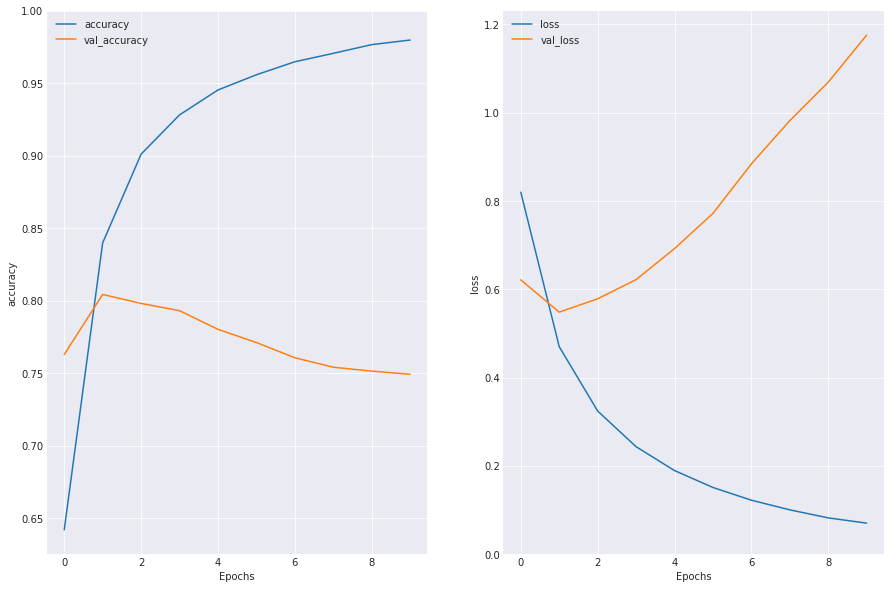

In [66]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plot_graphs(history_base, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_base, 'loss')
plt.ylim(0, None)

Inferences:
The model performs well on training data but has a significant difference b/w train data and validation data
The model is overfit in nature

Handling overfitting

In [67]:
import tensorflow
regularise = tensorflow.keras.regularizers.l2(0.001)

model_r = Sequential()
model_r.add(Embedding(50000,128,input_length=train_padding.shape[1]))
model_r.add(Dropout(0.5))
model_r.add(GlobalAveragePooling1D())
model_r.add(Dense(8,activation='relu',kernel_regularizer=regularise))
model_r.add(Dropout(0.5))
model_r.add(Dense(3,activation='softmax'))
model_r.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 128)           6400000   
_________________________________________________________________
dropout (Dropout)            (None, 50, 128)           0         
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 1032      
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 6,401,059
Trainable params: 6,401,059
Non-trainable params: 0
____________________________________________

In [68]:
#Compiling the model
model_r.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#Fitting the model

history_r = model_r.fit(train_padding,y_train ,epochs=8, validation_split=0.2)

Epoch 1/8
1029/1029 [==============================] - 44s 42ms/step - loss: 0.9995 - accuracy: 0.4995 - val_loss: 0.8815 - val_accuracy: 0.6402
Epoch 2/8
1029/1029 [==============================] - 43s 42ms/step - loss: 0.8405 - accuracy: 0.6607 - val_loss: 0.7728 - val_accuracy: 0.6831
Epoch 3/8
1029/1029 [==============================] - 43s 42ms/step - loss: 0.7502 - accuracy: 0.7062 - val_loss: 0.7228 - val_accuracy: 0.6968
Epoch 4/8
1029/1029 [==============================] - 43s 42ms/step - loss: 0.6936 - accuracy: 0.7247 - val_loss: 0.6976 - val_accuracy: 0.6998
Epoch 5/8
1029/1029 [==============================] - 43s 42ms/step - loss: 0.6540 - accuracy: 0.7336 - val_loss: 0.6768 - val_accuracy: 0.6990
Epoch 6/8
1029/1029 [==============================] - 43s 42ms/step - loss: 0.6237 - accuracy: 0.7414 - val_loss: 0.6823 - val_accuracy: 0.6851
Epoch 7/8
1029/1029 [==============================] - 43s 42ms/step - loss: 0.5991 - accuracy: 0.7464 - val_loss: 0.6781 - val_ac

(0.0, 1.0206827402114869)

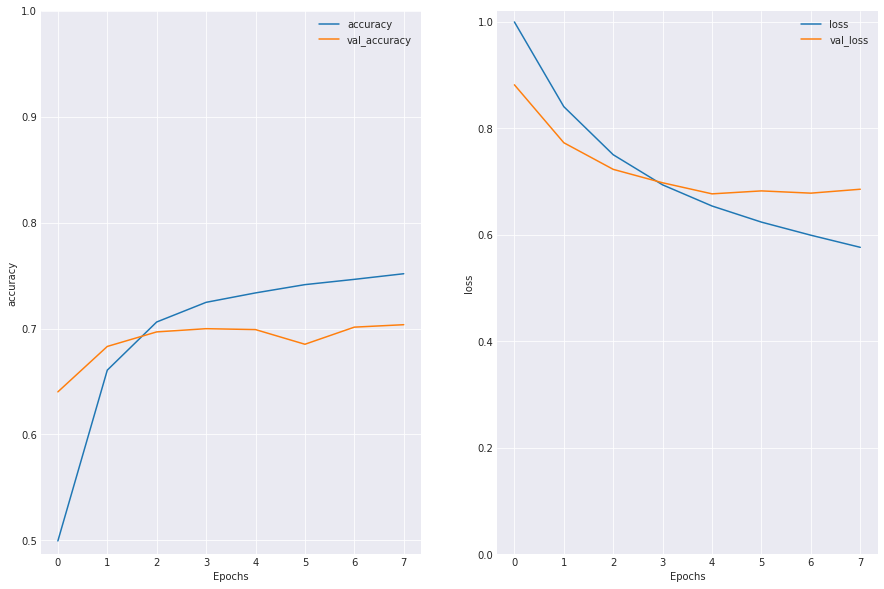

In [69]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plot_graphs(history_r, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_r, 'loss')
plt.ylim(0, None)

In [70]:
score = model_r.evaluate(test_padding,y_test.toarray()) 
print("Testing Accuracy(%): ", score[1]*100)

119/119 [==============================] - 0s 1ms/step - loss: 0.7015 - accuracy: 0.7191
Testing Accuracy(%):  71.90626859664917


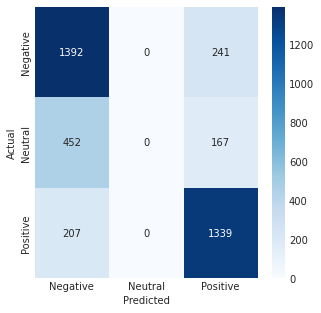

In [71]:
y_pred = model_r.predict(test_padding)
y_predicted_labels = np.array([ np.argmax(i) for i in y_pred])
y_test_labels = np.array([ np.argmax(i) for i in y_test])
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_labels, y_predicted_labels)
import seaborn as sn
labels=['Negative', 'Neutral','Positive']
plt.figure(figsize=(5,5))
sn.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Using LSTM:(Long Short-Term Memory)**

1. In the simple RNN layer, input from previous timestamps gradually disappeared as we got further through the input.
2. With a LSTM we have a long-term memory data structure storing all the previously seen inputs as well as when we saw them.
3. This allows for us to access any previous value we want at any point in time.
4. This adds to the complexity of our network and allows it to discover more useful relationships between inputs and when they appear.

In [72]:
from keras.constraints import max_norm
#Building the model
model1 = Sequential([
    Embedding(50000,128,input_length=train_padding.shape[1]),
    Dropout(0.5),
    LSTM(32,kernel_constraint=max_norm(3)),
    Dense(32,activation='relu',kernel_regularizer=regularise),
    Dropout(0.5),
    Dense(3,activation='softmax')
])
#Compiling the model
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#Fitting the model
history1 =  model1.fit(train_padding,y_train ,epochs=8, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=3)])

Epoch 1/8
1029/1029 [==============================] - 93s 88ms/step - loss: 1.0316 - accuracy: 0.4424 - val_loss: 0.8965 - val_accuracy: 0.5552
Epoch 2/8
1029/1029 [==============================] - 89s 87ms/step - loss: 0.7776 - accuracy: 0.6690 - val_loss: 0.6081 - val_accuracy: 0.7889
Epoch 3/8
1029/1029 [==============================] - 90s 87ms/step - loss: 0.5335 - accuracy: 0.8231 - val_loss: 0.5396 - val_accuracy: 0.8200
Epoch 4/8
1029/1029 [==============================] - 89s 86ms/step - loss: 0.4107 - accuracy: 0.8760 - val_loss: 0.5080 - val_accuracy: 0.8319
Epoch 5/8
1029/1029 [==============================] - 89s 87ms/step - loss: 0.3356 - accuracy: 0.8996 - val_loss: 0.5522 - val_accuracy: 0.8299
Epoch 6/8
1029/1029 [==============================] - 88s 86ms/step - loss: 0.2759 - accuracy: 0.9175 - val_loss: 0.6534 - val_accuracy: 0.8052
Epoch 7/8
1029/1029 [==============================] - 89s 87ms/step - loss: 0.2369 - accuracy: 0.9269 - val_loss: 0.6422 - val_ac

(0.0, 1.0713552743196488)

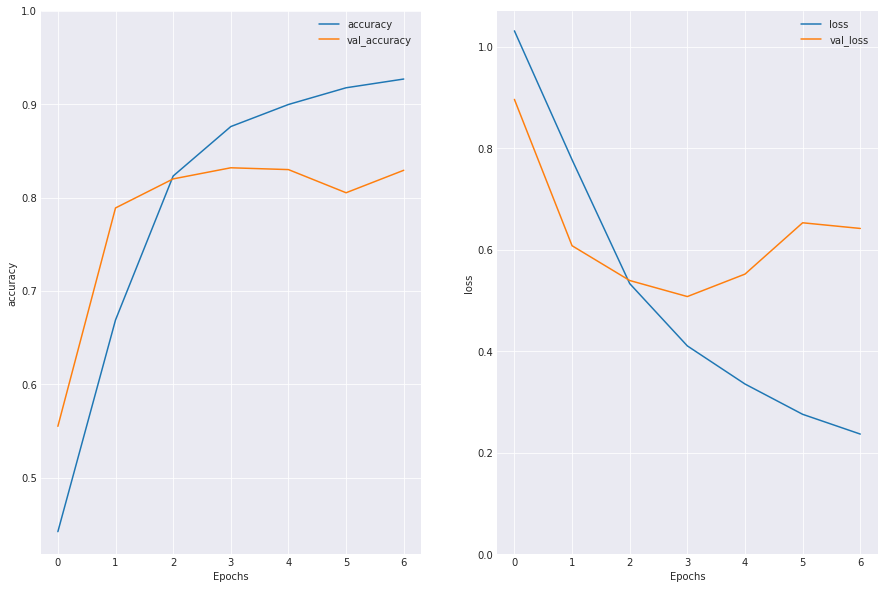

In [73]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plot_graphs(history1, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history1, 'loss')
plt.ylim(0, None)

Model evaluation

In [74]:
score = model1.evaluate(test_padding,y_test.toarray()) 
print("Testing Accuracy(%): ", score[1]*100)

119/119 [==============================] - 2s 13ms/step - loss: 0.6855 - accuracy: 0.8112
Testing Accuracy(%):  81.1216413974762


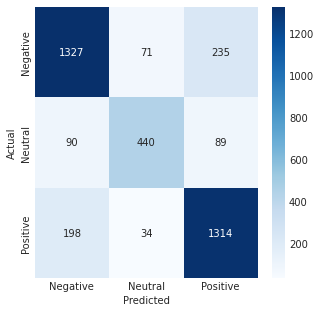

In [75]:
y_pred = model1.predict(test_padding)
y_predicted_labels = np.array([ np.argmax(i) for i in y_pred])
y_test_labels = np.array([ np.argmax(i) for i in y_test])
cm = confusion_matrix(y_test_labels, y_predicted_labels)
labels=['Negative', 'Neutral','Positive']
plt.figure(figsize=(5,5))
sn.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [76]:
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score
print('\n=================Classification Report========================\n')
print(classification_report(y_test_labels, y_predicted_labels, target_names=['Class  Negative',	 'Class Neutral','Class positive']))


=================Classification Report========================

                 precision    recall  f1-score   support

Class  Negative       0.82      0.81      0.82      1633
  Class Neutral       0.81      0.71      0.76       619
 Class positive       0.80      0.85      0.83      1546

       accuracy                           0.81      3798
      macro avg       0.81      0.79      0.80      3798
   weighted avg       0.81      0.81      0.81      3798



Inferences:
The model with LSTM performed much better than simple RNN as there is an increase in accuracy, both training as well as testing A bit of hyperparameter tuning was done to prevent overfitting

In [77]:
#Building the model
model2 = Sequential([
    Embedding(50000,128,input_length=train_padding.shape[1]),
    Bidirectional(LSTM(128,return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(32,activation='relu'),
    Dropout(0.5),
    Dense(3,activation='softmax')
])
#Compiling the model
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#Fitting the model
history2 =  model2.fit(train_padding,y_train ,epochs=8, validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=3)])

Epoch 1/8
1029/1029 [==============================] - 269s 252ms/step - loss: 0.6750 - accuracy: 0.7252 - val_loss: 0.4547 - val_accuracy: 0.8414
Epoch 2/8
1029/1029 [==============================] - 256s 249ms/step - loss: 0.3760 - accuracy: 0.8797 - val_loss: 0.4697 - val_accuracy: 0.8445
Epoch 3/8
1029/1029 [==============================] - 257s 249ms/step - loss: 0.2353 - accuracy: 0.9248 - val_loss: 0.5380 - val_accuracy: 0.8361
Epoch 4/8
1029/1029 [==============================] - 257s 250ms/step - loss: 0.1573 - accuracy: 0.9511 - val_loss: 0.6650 - val_accuracy: 0.8296


(0.0, 0.7008959442377091)

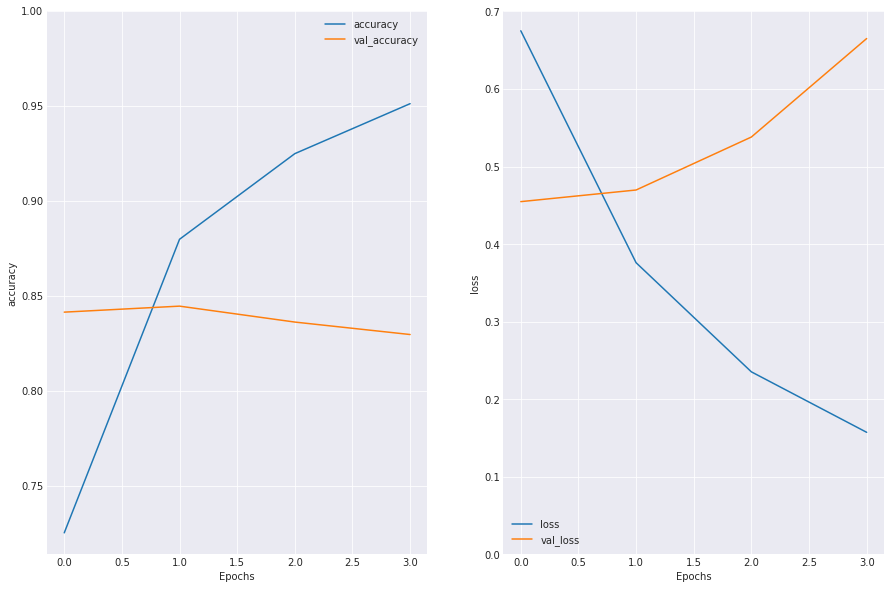

In [78]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plot_graphs(history2, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history2, 'loss')
plt.ylim(0, None)

**Model evaluation**

In [79]:
score = model2.evaluate(test_padding,y_test.toarray()) 
print("Testing Accuracy(%): ", score[1]*100)

119/119 [==============================] - 7s 55ms/step - loss: 0.6498 - accuracy: 0.8249
Testing Accuracy(%):  82.49078392982483


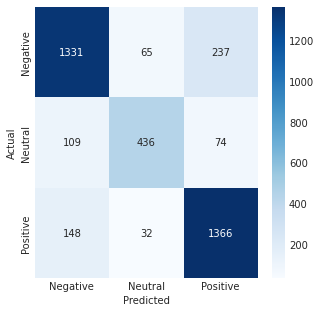

In [80]:
y_pred = model2.predict(test_padding)
y_predicted_labels = np.array([ np.argmax(i) for i in y_pred])
y_test_labels = np.array([ np.argmax(i) for i in y_test])
cm = confusion_matrix(y_test_labels, y_predicted_labels)
labels=['Negative', 'Neutral','Positive']
plt.figure(figsize=(5,5))
sn.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [81]:
from sklearn.metrics import classification_report
print('\n=================Classification Report for Bidirectional LSTM========================\n')
print(classification_report(y_test_labels, y_predicted_labels, target_names=['Class  Negative',	 'Class Neutral','Class positive']))


=================Classification Report for Bidirectional LSTM========================

                 precision    recall  f1-score   support

Class  Negative       0.84      0.82      0.83      1633
  Class Neutral       0.82      0.70      0.76       619
 Class positive       0.81      0.88      0.85      1546

       accuracy                           0.82      3798
      macro avg       0.82      0.80      0.81      3798
   weighted avg       0.83      0.82      0.82      3798



**Conclusion**
1. While dealing with problem statement related to sentiment analysis, the sequence of data plays an important role
2. Therefore, the traditional ML models gives poor results
3. To help the model preserve the sequence and understand the meaning of the data feature in form of text, recurrent neural network i.e., RNN is used as a baseline model
4. LSTM and Bidirectional LSTM were built to improve the accuracy further
5. Though the latter gave better accuracy, it suffered from the problem of overfitting.
6. Thus, for this dataset, LSTM seems to be the feasible model.For around 5 epoch, it gave an accuracy around 82%